# Model Identification

Now that we have determined the order of differencing (which is 1), now we must identify the **autoregressive order (AR) p** and the **moving average (MA) order q** for the ARIMA model.

- Autogressive order: indicates that the evolving variable of interest is determined by order p before. 
    - For example, in order to determine your future behaviour, you would look at your behaviour p days before to predict this.
- Moving average order: The order by which you use past predictions to correct future predictions. 
    - For example, if you predicted your mood to be 5 yesterday, but it was actually 6, your error would be +1. You carry this over to future predictions

## ACF and PACF

We can use the autocorrelation function and partial autocorrelation function to determine the orders p and q.

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

In [12]:
#Importing differenced data
btc_diff_data = pd.read_csv('data/btc_data_diff.csv')

In [13]:
#Drop every column except closing prices
btc_diff_data['Date'] = pd.to_datetime(btc_diff_data['Date'])
btc_diff_data.set_index('Date', inplace=True)
btc_diff_data = btc_diff_data.dropna().astype(float)
btc_diff_data = btc_diff_data['Close']

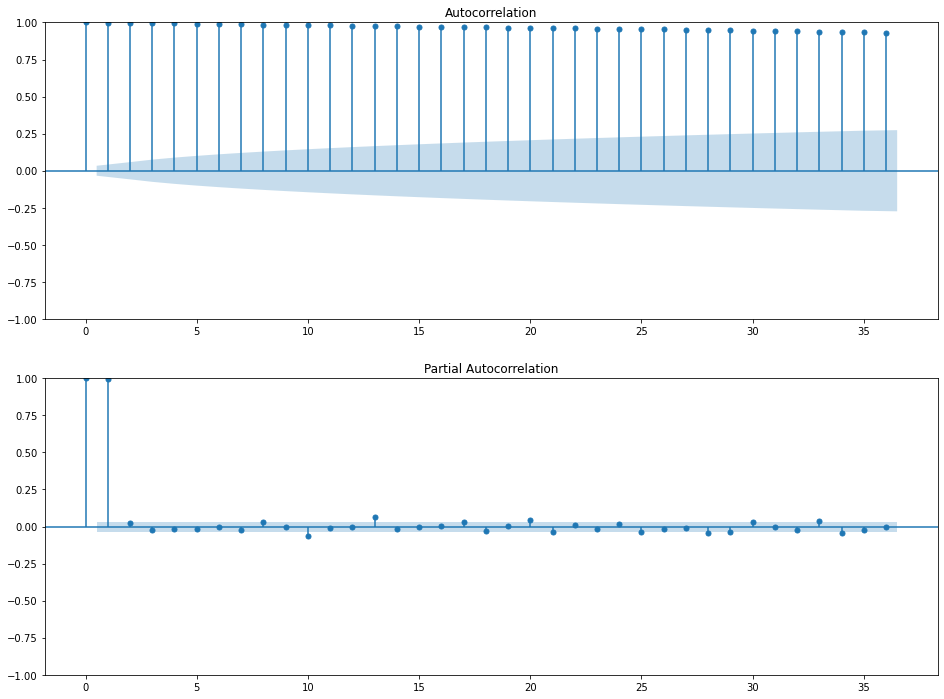

In [20]:
#Plots for ACF and PACF
fig, ax = plt.subplots(2, figsize=(16, 12))
plot_acf(btc_diff_data, ax=ax[0])
plot_pacf(btc_diff_data, ax=ax[1])
plt.show()

The ACF plot shows a gradual drop around 1, suggesting that the time series is more autoregressive in nature. The PACF plot shows a sharp spike and drop, indicative of an autoregressive process. Given this we consider the parameters to be:
- AR(p): **1**, this is because of the significant spike lag in the PACF plot
- MA(q): **0 then test with 1**, this is because the ACF plot doesn't show a strong average moving component, so initially test with 0 then 1.
- Differencing(d): As shown in data analysis, the differencing order is **1**.

Now that we have the relevant parameters, we can input these into the ARIMA model

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3410
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -27564.888
Date:                Thu, 20 Jun 2024   AIC                          55133.777
Time:                        16:15:45   BIC                          55146.045
Sample:                    09-19-2014   HQIC                         55138.161
                         - 01-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0284      0.009     -3.138      0.002      -0.046      -0.011
sigma2       6.18e+05   4979.746    124.103      0.000    6.08e+05    6.28e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

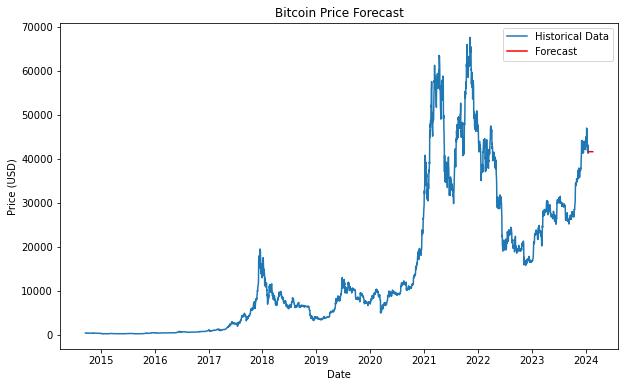

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with initial guess p=1, d=1, q=0
model = ARIMA(btc_diff_data, order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# Alternatively, test with p=1, d=1, q=1
model = ARIMA(btc_diff_data, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(btc_diff_data, label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
